# Taiwanese stock volatility and normal distribution

In [1]:
import datetime as dt
dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

'2016-10-19 21:09:28'

In [2]:
cd ~/Development/pytwstock/

/home/zhxie/Development/pytwstock


In [3]:
%matplotlib inline
from twstock.twstockdb.TWStockDatabase import TWSECDB
twdb = TWSECDB("/d/StockDatabase/twsecdb.scdb")

In [4]:
stock_list = twdb.get_stock_list(stock_type='PO')
stock_list = [x[0] for x in stock_list]

In [5]:
import datetime as dt
total_foreign_shares = None
total_foreign_equitity = None
for stock_no in stock_list:
    f = twdb.query_taiwan_stock_foreign_holdings_time_series(stock_no)
    f = f['foreign_china_hold']
    f = f.fillna(0)
    prices = twdb.query_taiwan_stock_ohlcv_time_series(stock_no, from_date=dt.date(2004,2,11))
    close_price = prices['close']
    close_price = close_price.fillna(0)
    e = f*close_price
    if total_foreign_shares is None:
        total_foreign_shares = f
    else:
        total_foreign_shares = total_foreign_shares.add(f, fill_value=0)
    if total_foreign_equitity is None:
        total_foreign_equitity = e
    else:
        total_foreign_equitity = total_foreign_equitity.add(e, fill_value=0)
total_foreign_equitity = total_foreign_equitity[total_foreign_equitity != 0]
total_foreign_equitity = total_foreign_equitity.dropna()

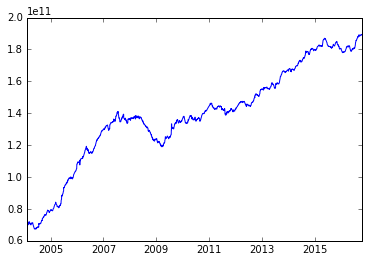

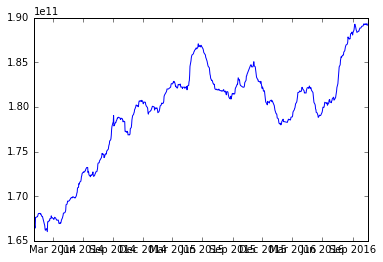

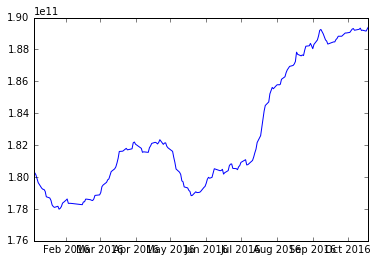

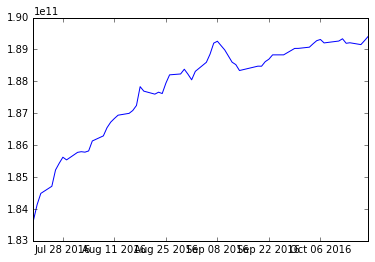

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(total_foreign_shares)
plt.figure()
plt.cla()
plt.plot(total_foreign_shares.ix[dt.date(2014,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_shares.ix[dt.date(2016,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_shares.ix[-62:])

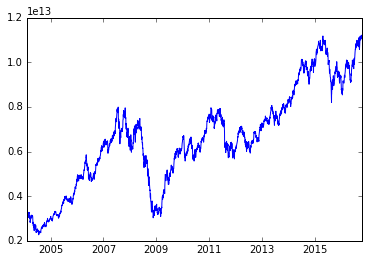

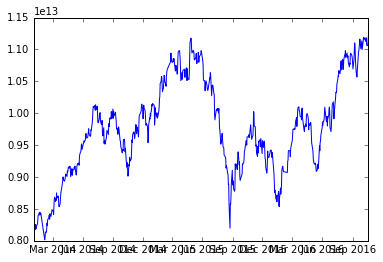

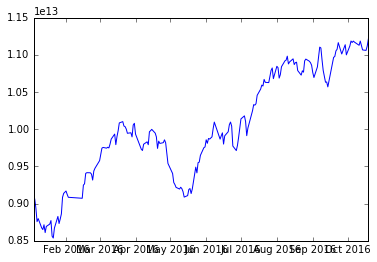

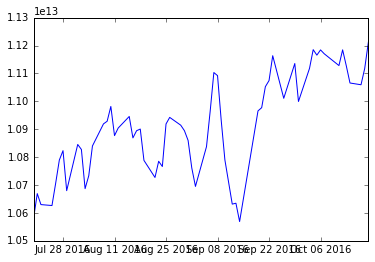

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(total_foreign_equitity)
plt.figure()
plt.cla()
plt.plot(total_foreign_equitity.ix[dt.date(2014,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_equitity.ix[dt.date(2016,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_equitity.ix[-62:])

In [8]:
tmp = total_foreign_shares.shift(1)
shift_foreign_shares = tmp.ix[1:]
foreign_shares_volatility = (total_foreign_shares.add(shift_foreign_shares*-1, fill_value=0))/total_foreign_shares
foreign_shares_volatility = foreign_shares_volatility.ix[1:]

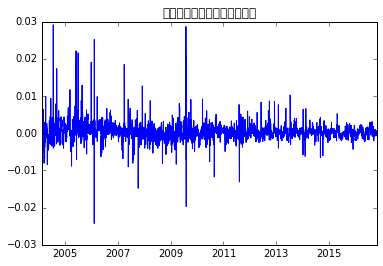

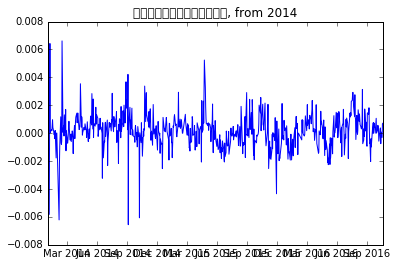

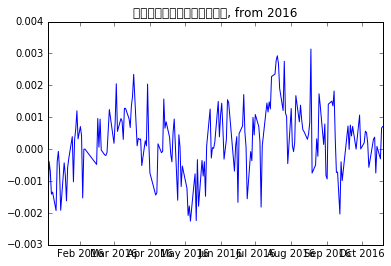

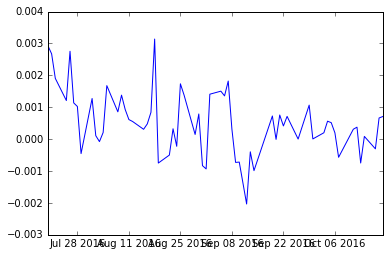

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(foreign_shares_volatility)
plt.title("外資持股相對前一天增減比例")
plt.figure()
plt.cla()
plt.plot(foreign_shares_volatility.ix[dt.date(2014,1,1):])
plt.title("外資持股相對前一天增減比例, from 2014")
plt.figure()
plt.cla()
plt.plot(foreign_shares_volatility.ix[dt.date(2016,1,1):])
plt.title("外資持股相對前一天增減比例, from 2016")
plt.figure()
plt.cla()
plt.plot(foreign_shares_volatility.ix[-62:])

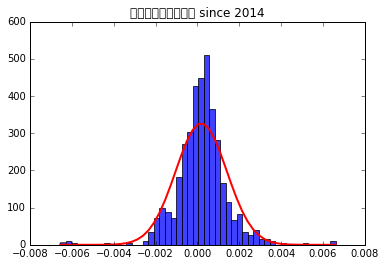

NormaltestResult(statistic=101.94906566983961, pvalue=7.2784964111229763e-23)

In [10]:
import matplotlib.mlab as mlab
import scipy.stats as stats
n, bins, patches = plt.hist(foreign_shares_volatility.ix[dt.date(2014,1,1):], 50, normed=1, facecolor='blue', alpha=0.75)
sigma = foreign_shares_volatility.ix[dt.date(2014,1,1):].std() 
mu = foreign_shares_volatility.ix[dt.date(2014,1,1):].mean() 
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=2)
plt.title("外資持股變化率分佈 since 2014")
plt.show()
stats.normaltest(foreign_shares_volatility.ix[dt.date(2014,1,1):])

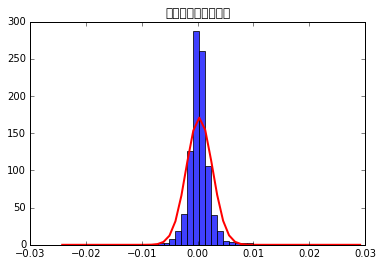

NormaltestResult(statistic=2096.9768218297372, pvalue=0.0)

In [11]:
n, bins, patches = plt.hist(foreign_shares_volatility, 50, normed=1, facecolor='blue', alpha=0.75)
sigma = foreign_shares_volatility.std() 
mu = foreign_shares_volatility.mean() 
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=2)
plt.title("外資持股變化率分佈")
plt.show()
stats.normaltest(foreign_shares_volatility)

In [12]:
tmp = total_foreign_equitity.shift(1)
shifted_foreign_equitity = tmp.ix[1:]
foreign_equitity_volatility = (total_foreign_equitity.add(shifted_foreign_equitity*-1))/total_foreign_equitity
foreign_equitity_volatility = foreign_equitity_volatility.fillna(0)

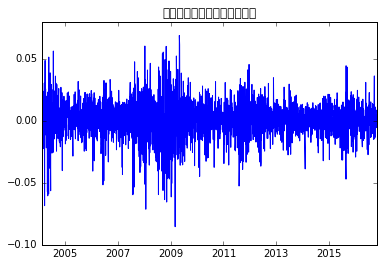

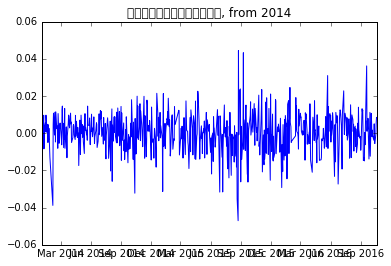

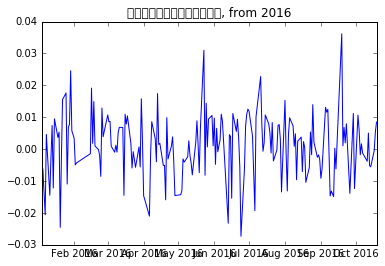

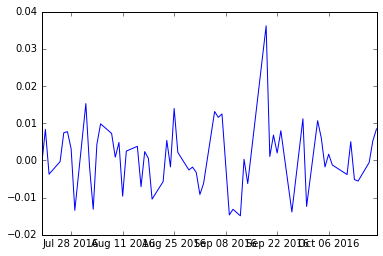

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(foreign_equitity_volatility)
plt.title("外資淨值相對前一天增減比例")
plt.figure()
plt.cla()
plt.plot(foreign_equitity_volatility.ix[dt.date(2014,1,1):])
plt.title("外資淨值相對前一天增減比例, from 2014")
plt.figure()
plt.cla()
plt.plot(foreign_equitity_volatility.ix[dt.date(2016,1,1):])
plt.title("外資淨值相對前一天增減比例, from 2016")
plt.figure()
plt.cla()
plt.plot(foreign_equitity_volatility.ix[-62:])

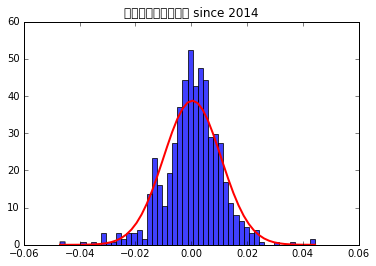

NormaltestResult(statistic=45.845727290915349, pvalue=1.1084773141240244e-10)

In [14]:
foreign_equitity_volatility = foreign_equitity_volatility.fillna(0)
n, bins, patches = plt.hist(foreign_equitity_volatility.ix[dt.date(2014,1,1):], 50, normed=1, facecolor='blue', alpha=0.75)
sigma = foreign_equitity_volatility.ix[dt.date(2014,1,1):].std() 
mu = foreign_equitity_volatility.ix[dt.date(2014,1,1):].mean() 
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=2)
plt.title("外資持股變化率分佈 since 2014")
plt.show()
stats.normaltest(foreign_equitity_volatility.ix[dt.date(2014,1,1):])

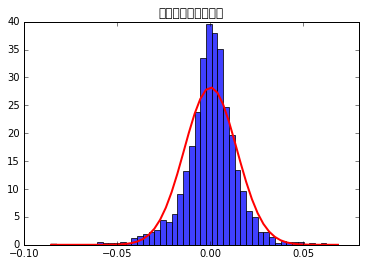

NormaltestResult(statistic=338.35547275667261, pvalue=3.3654460270828369e-74)

In [15]:
foreign_equitity_volatility = foreign_equitity_volatility.fillna(0)
n, bins, patches = plt.hist(foreign_equitity_volatility, 50, normed=1, facecolor='blue', alpha=0.75)
sigma = foreign_equitity_volatility.std() 
mu = foreign_equitity_volatility.mean() 
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=2)
plt.title("外資持股變化率分佈")
plt.show()
stats.normaltest(foreign_equitity_volatility)

## Taiwanese PO stock foreign holding total value change day by day

In [16]:
shifted_foreign_equitity = total_foreign_equitity.shift(1)
shifted_foreign_equitity = shifted_foreign_equitity.ix[1:]
foreign_holding_value_change_d2d = total_foreign_equitity.add(shifted_foreign_equitity*-1, fill_value=0)

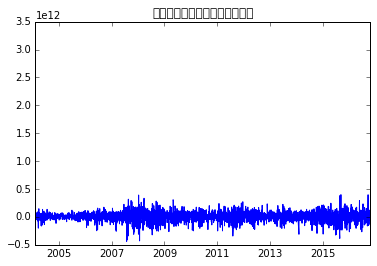

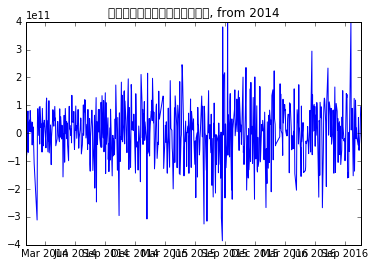

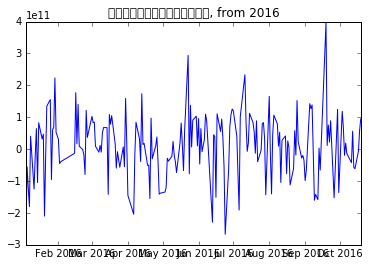

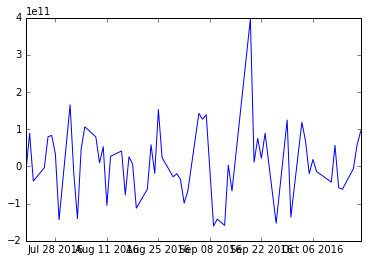

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(foreign_holding_value_change_d2d)
plt.title("外資淨值相對前一天增減絕對值")
plt.figure()
plt.cla()
plt.plot(foreign_holding_value_change_d2d.ix[dt.date(2014,1,1):])
plt.title("外資淨值相對前一天增減絕對值, from 2014")
plt.figure()
plt.cla()
plt.plot(foreign_holding_value_change_d2d.ix[dt.date(2016,1,1):])
plt.title("外資淨值相對前一天增減絕對值, from 2016")
plt.figure()
plt.cla()
plt.plot(foreign_holding_value_change_d2d.ix[-62:])

## Taiwanese PO stock foreign holding shares change day by day

In [18]:
shifted_foreign_shares = total_foreign_shares.shift(1)
shifted_foreign_shares = shifted_foreign_shares.ix[1:]
foreign_holding_shares_change_d2d = total_foreign_shares.add(shifted_foreign_shares*-1, fill_value=0)

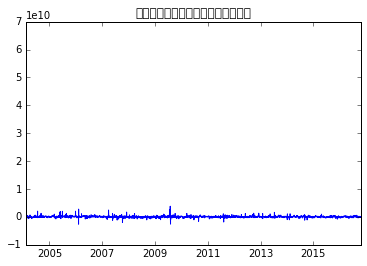

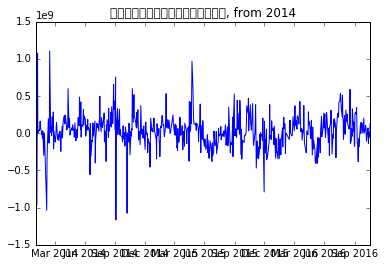

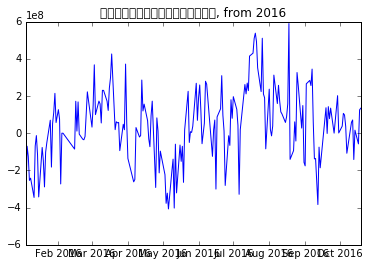

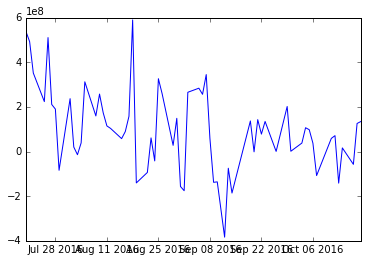

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(foreign_holding_shares_change_d2d)
plt.title("外資持股數量相對前一天增減絕對值")
plt.figure()
plt.cla()
plt.plot(foreign_holding_shares_change_d2d.ix[dt.date(2014,1,1):])
plt.title("外資持股數量相對前一天增減絕對值, from 2014")
plt.figure()
plt.cla()
plt.plot(foreign_holding_shares_change_d2d.ix[dt.date(2016,1,1):])
plt.title("外資持股數量相對前一天增減絕對值, from 2016")
plt.figure()
plt.cla()
plt.plot(foreign_holding_shares_change_d2d.ix[-62:])

In [32]:
twindex = twdb.query_taiwan_index_time_series(from_date=foreign_holding_shares_change_d2d.index[0])
twindex = twindex['close']

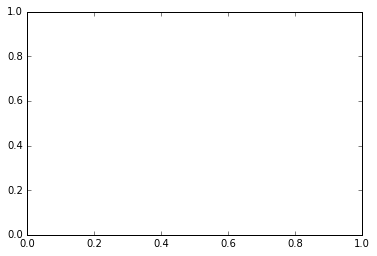

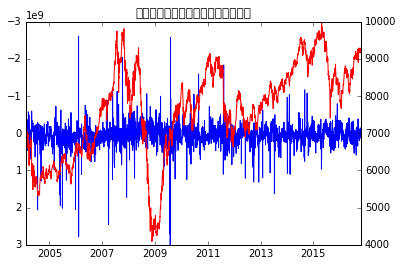

In [37]:
plt.cla()
fig, ax1 = plt.subplots()
ax1.plot(foreign_holding_shares_change_d2d)
plt.ylim([-3.0e+9, 3.0e+9])
plt.title("外資持股數量相對前一天增減絕對值")
ax2 = ax1.twinx()
ax2.plot(twindex, 'r')

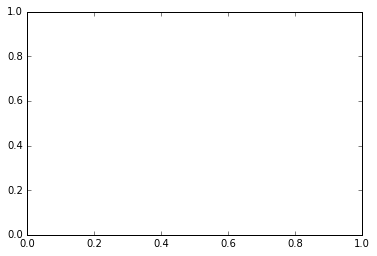

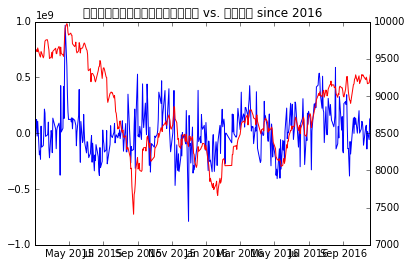

In [61]:
plt.cla()
fig, ax1 = plt.subplots()
ax1.plot(foreign_holding_shares_change_d2d.ix[dt.date(2015,3,1):])
plt.ylim([-1.0e+9, 1.0e+9])
plt.title("外資持股數量相對前一天增減絕對值 vs. 加權指數 since 2016")
ax2 = ax1.twinx()
ax2.plot(twindex.ix[dt.date(2015,3,1):], 'r')
a = foreign_holding_shares_change_d2d


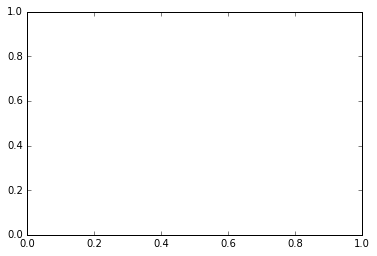

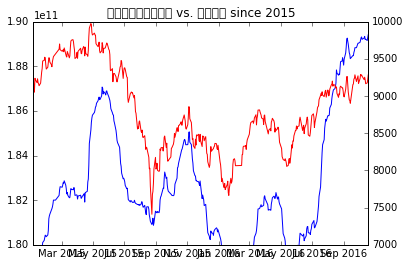

In [55]:
plt.cla()
fig, ax1 = plt.subplots()
ax1.plot(total_foreign_shares.ix[dt.date(2015,1,1):], 'b')
plt.ylim([1.8e+11, 1.9e+11])
plt.title("外資持股數量絕對值 vs. 加權指數 since 2015")
ax2 = ax1.twinx()
ax2.plot(twindex.ix[dt.date(2015,1,1):], 'r')